In [8]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

#  Butterworth Band-pass filter (2nd order)

### Making a dummy signal using sine

In [13]:
sample_freq=10000
t = np.linspace(0, 1, sample_freq, False)  # 1 second
sig = np.sin(2*np.pi*10*t)+np.sin(2*np.pi*50*t)# + np.sin(2*np.pi*90*t)+np.sin(2*np.pi*0.01*t)+np.sin(2*np.pi*50*t)#+np.sin(2*np.pi*80*t)+np.sin(2*np.pi*130*t)

###  Making the butterworth filter 0.1-60Hz

C:\Users\47404\AppData\Local\Temp/ipykernel_2148/1671763753.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(w_butter,20*np.log10(abs(h_butter)))


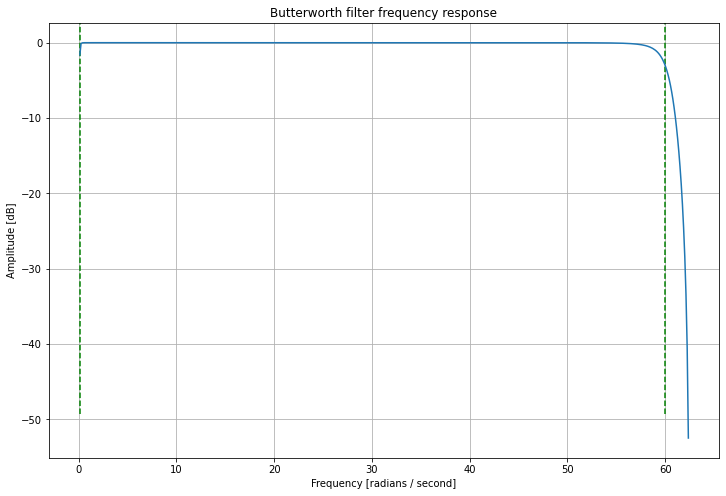

In [14]:
low=0.1
high=60
butter_freq=125
b, a = signal.butter(N=2, Wn=[low, high], btype='bandpass',fs=butter_freq, output='ba')
x_butterworth = signal.lfilter(b,a,sig)

w_butter,h_butter = signal.freqz(b, a, fs=butter_freq)
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.set_xlabel('Frequency [radians / second]')
ax.set_ylabel('Amplitude [dB]')
ax.axvline(x=high, ymin=0.10, color='g', ls='--', lw=1.5)
ax.axvline(x=low, ymin=0.10, color='g', ls='--', lw=1.5)
#ax.set_xlim([0,100])
ax.set_title('Butterworth filter frequency response')
# ax.set_xlim([0,1]) #  To hav a closer look at the lower lim
ax.plot(w_butter,20*np.log10(abs(h_butter)))
ax.grid()
plt.show()

### Adding notch filter 50Hz

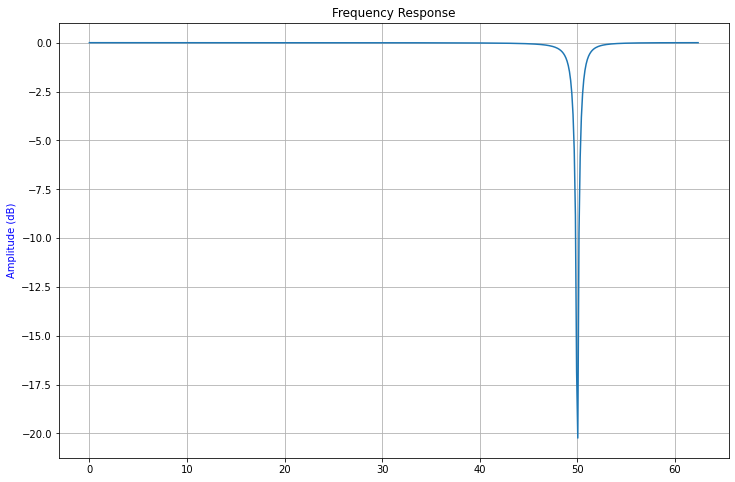

In [15]:
fs = butter_freq  # Sample frequency (Hz)
f0 = 50.0  # Frequency to be removed from signal (Hz)
Q = 50.0  # Quality factor
b, a = signal.iirnotch(f0, Q, fs)
x_notch= signal.lfilter(b,a,sig)
y=signal.lfilter(b,a,x_butterworth)

freq, h = signal.freqz(b, a, fs=fs)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(freq, 20*np.log10(abs(h)))
#  ax.set_xlim([0,1]) #  To hav a closer look at the lower lim
ax.set_title("Frequency Response")
ax.set_ylabel("Amplitude (dB)", color='blue')
ax.grid()
plt.show()

### Plotting the graphs

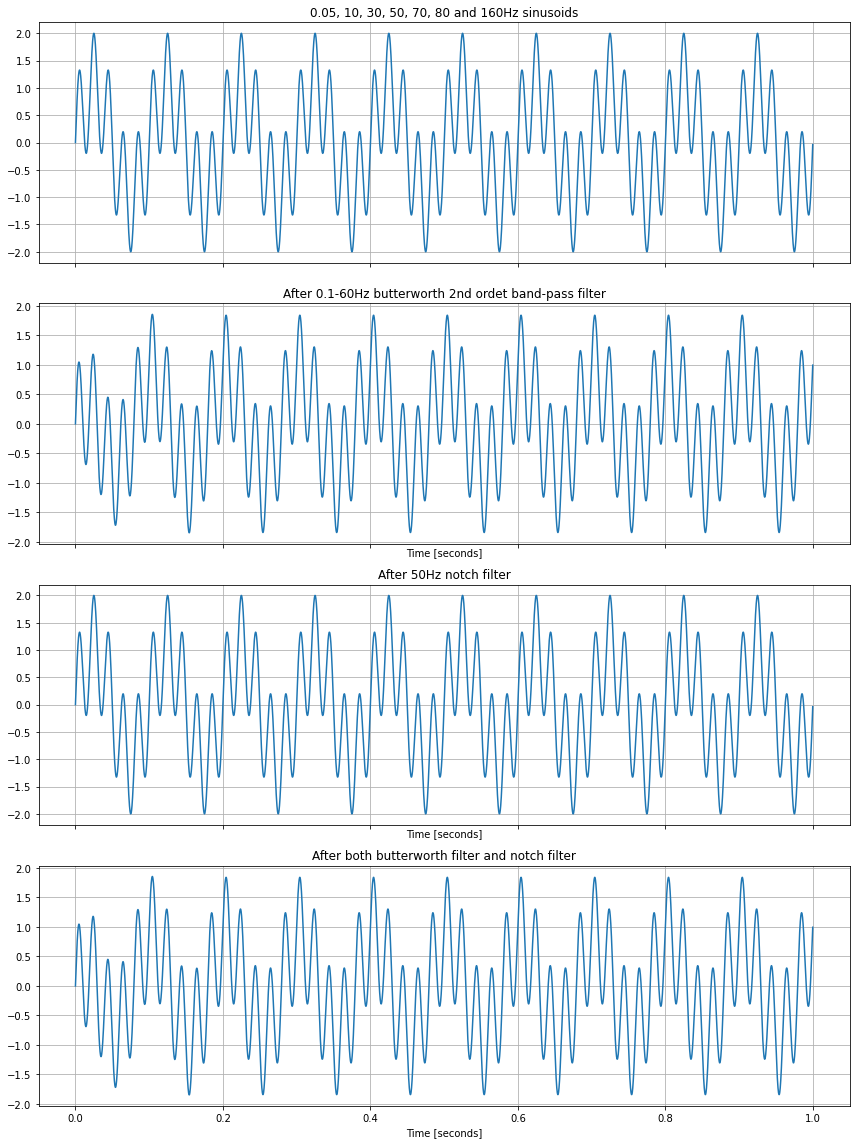

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(12,16))
width=4
ax1.plot(t, sig)
ax1.set_title('0.05, 10, 30, 50, 70, 80 and 160Hz sinusoids')
#ax1.axis([0, 1, -width, width])
ax1.grid()

ax2.plot(t, x_butterworth)
ax2.set_title('After 0.1-60Hz butterworth 2nd ordet band-pass filter')
#ax2.axis([0, 1, -width, width])
ax2.set_xlabel('Time [seconds]')
ax2.grid()

ax3.plot(t,x_notch)
ax3.set_title('After 50Hz notch filter')
#ax3.axis([0, 1, -width, width])
ax3.set_xlabel('Time [seconds]')
ax3.grid()

ax4.plot(t,y)
ax4.set_title('After both butterworth filter and notch filter')
#ax4.axis([0, 1, -width, width])
ax4.set_xlabel('Time [seconds]')
ax4.grid()

plt.tight_layout()
plt.show()